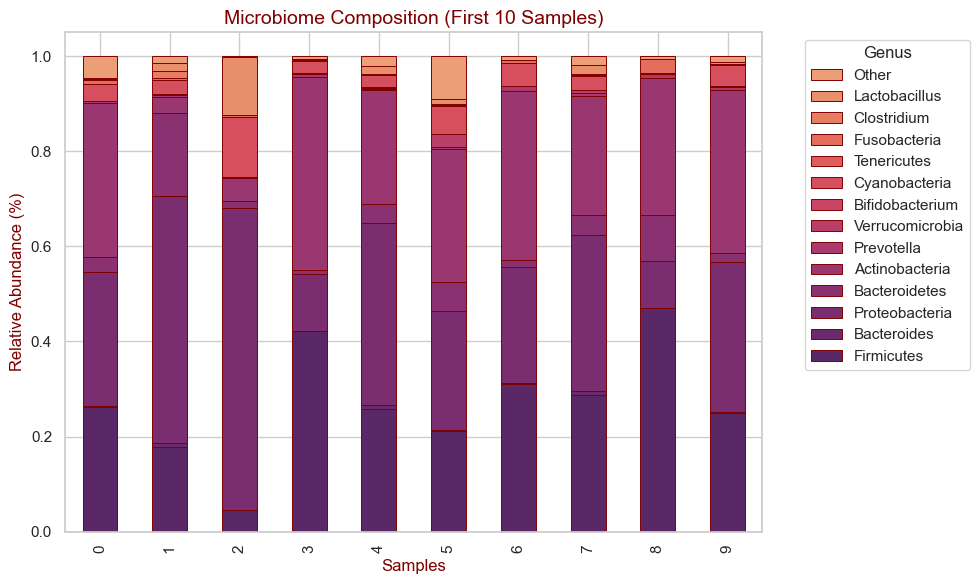

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('./data/combined_ag_data.csv')

genera = ['Actinobacteria', 'Bacteroides', 'Bacteroidetes', 'Bifidobacterium', 'Clostridium',
          'Cyanobacteria', 'Firmicutes', 'Fusobacteria', 'Lactobacillus', 'Other', 'Prevotella',
          'Proteobacteria', 'Tenericutes', 'Verrucomicrobia']

genera_ordered = data[genera].sum().sort_values(ascending=False).index.tolist()
data_sorted = data[genera_ordered]

sns.set_theme(style="whitegrid")
pink_palette = sns.color_palette("flare_r", n_colors=len(genera))
maroon = "#800000"


# Microbiome composition (stacked bar)
ax = data_sorted[genera_ordered].iloc[:10].plot(
    kind="bar", stacked=True, figsize=(10, 6), 
    color=pink_palette, edgecolor=maroon, linewidth=0.7,
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title="Genus", bbox_to_anchor=(1.05, 1))

plt.title("Microbiome Composition (First 10 Samples)", color=maroon, fontsize=14)
plt.ylabel("Relative Abundance (%)", color=maroon)
plt.xlabel("Samples", color=maroon)
plt.tight_layout()
plt.show()

/var/folders/4c/dksdqz190wq3kkq3t17dyspc0000gn/T/ipykernel_48143/958791231.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_abundance.index, y=mean_abundance.values, palette=sns.color_palette("flare", n_colors=len(mean_abundance))[::-1])


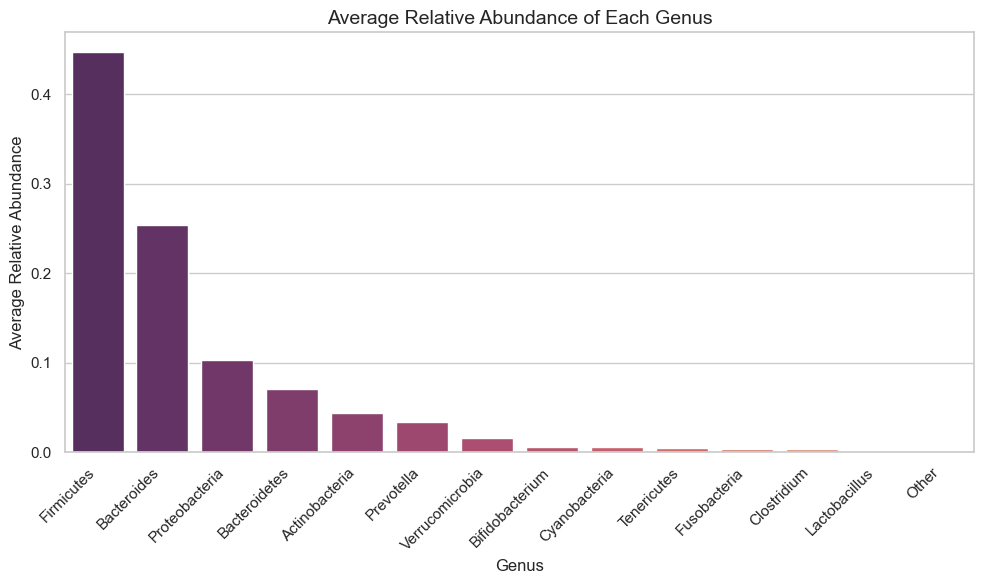

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute mean relative abundance per genus
mean_abundance = data[genera].mean().sort_values(ascending=False)


# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_abundance.index, y=mean_abundance.values, palette=sns.color_palette("flare", n_colors=len(mean_abundance))[::-1])
plt.xticks(rotation=45, ha='right')
plt.ylabel("Average Relative Abundance")
plt.xlabel("Genus")
plt.title("Average Relative Abundance of Each Genus", fontsize=14)
plt.tight_layout()
plt.show()

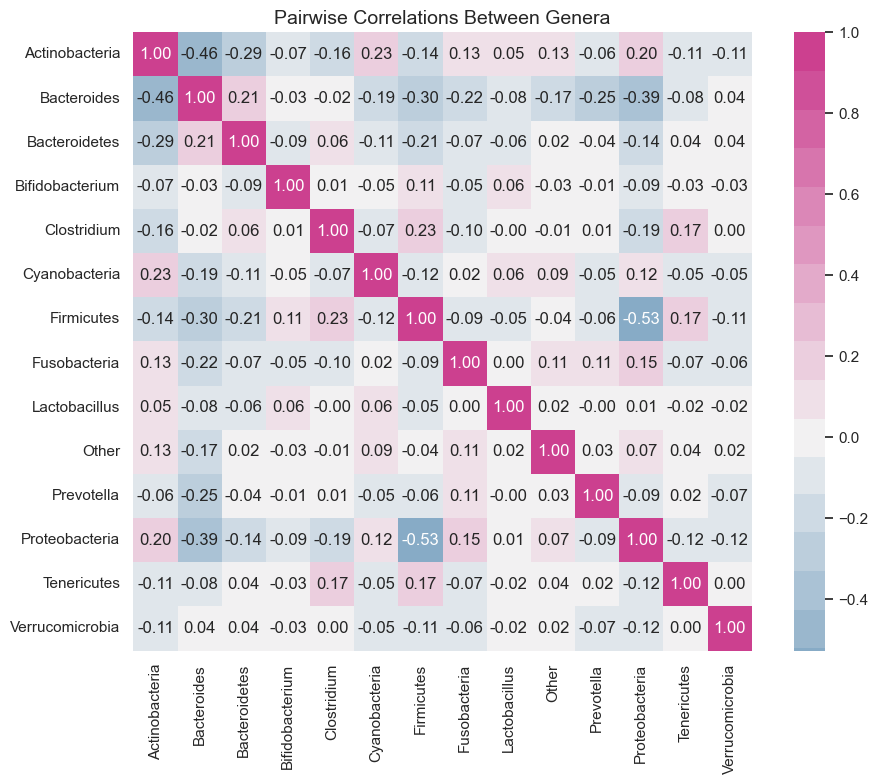

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix (Pearson by default)
genus_corr = data[genera].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(genus_corr, annot=True, fmt=".2f", cmap=sns.diverging_palette(240, 340, n=21), center=0, square=True)
plt.title("Pairwise Correlations Between Genera", fontsize=14)
plt.tight_layout()
plt.show()
